<a href="https://colab.research.google.com/github/Cecill22/Image-Classification/blob/main/Deep_Learning_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

#EDA

In [ ]:
pth = '/content/drive/MyDrive/Colab Notebooks/dataset/'

image dimensions: (256, 256)


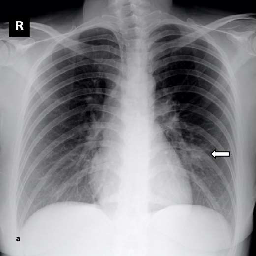

In [ ]:
from PIL import Image

# Getting sample covid image
covid_image_path = pth+'COVID/COVID_2.png'
covid_image = Image.open(covid_image_path)
print("image dimensions:",covid_image.size)
covid_image

image dimensions: (232, 232)


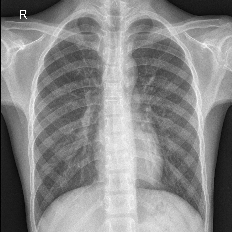

In [ ]:
# Getting sample normal image
normal_image_path = pth+'NORMAL/NORMAL_5.png'
normal_image = Image.open(normal_image_path)
print("image dimensions:", normal_image.size)
normal_image

In [ ]:
import shutil
from sklearn.model_selection import train_test_split

covid_dir = os.path.join(pth, 'COVID')
normal_dir = os.path.join(pth, 'NORMAL')

# Path ke direktori train dan test
train_dir = os.path.join(pth, 'train')
test_dir = os.path.join(pth, 'test')

# Membuat folder train dan test jika belum ada
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Membuat subfolder untuk masing-masing kelas di dalam train dan test
for category in ['COVID', 'NORMAL']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Fungsi untuk membagi data dan menyalin file
def split_and_copy_files(source_dir, train_target_dir, test_target_dir, test_size=0.2):
    files = os.listdir(source_dir)
    train_files, test_files = train_test_split(files, test_size=test_size, random_state=42)

    for file_name in train_files:
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(train_target_dir, file_name))

    for file_name in test_files:
        shutil.copy(os.path.join(source_dir, file_name), os.path.join(test_target_dir, file_name))

# Membagi dan menyalin file untuk masing-masing kategori
split_and_copy_files(covid_dir, os.path.join(train_dir, 'COVID'), os.path.join(test_dir, 'COVID'))
split_and_copy_files(normal_dir, os.path.join(train_dir, 'NORMAL'), os.path.join(test_dir, 'NORMAL'))

print("Dataset telah dibagi ke dalam folder train dan test.")

Dataset telah dibagi ke dalam folder train dan test.


In [ ]:
from itertools import chain
from matplotlib import pyplot as plt

# Creating set of dimensions
unique_dimensions = set()
unique_modes = set()

# Iterating through all images
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)
        # Adding shape and mode of give image to sets
        unique_dimensions.add(image.size[0])
        unique_dimensions.add(image.size[1])
        unique_modes.add(image.mode)

print("unique modes:", unique_modes)
print("unique dimensions:", unique_dimensions)

unique modes: {'RGBA', 'RGB'}
unique dimensions: {256, 232}


In [ ]:
from PIL import Image

# Path ke direktori train dan test
train_dir = os.path.join(pth, 'train')
test_dir = os.path.join(pth, 'test')

def preprocess_images(directory):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        for filename in os.listdir(subdir_path):
            file_path = os.path.join(subdir_path, filename)
            image = Image.open(file_path)

            # Konversi mode warna menjadi RGB dan ubah dimensi menjadi 100x100
            image = image.convert('RGB').resize((100, 100))

            # Simpan gambar yang telah diproses
            image.save(file_path)

# Memproses gambar di direktori train dan test
preprocess_images(train_dir)
preprocess_images(test_dir)

print("Semua gambar dalam mode palet telah dikonversi ke RGB dan diubah dimensinya menjadi 100x100 piksel.")


Semua gambar dalam mode palet telah dikonversi ke RGB dan diubah dimensinya menjadi 100x100 piksel.


In [ ]:
# Creating set of dimensions
unique_dimensions = set()
unique_modes = set()

# Iterating through all images
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)
        # Adding shape and mode of give image to sets
        unique_dimensions.add(image.size[0])
        unique_dimensions.add(image.size[1])
        unique_modes.add(image.mode)

print("unique modes:", unique_modes)
print("unique dimensions:", unique_dimensions)

unique modes: {'RGB'}
unique dimensions: {100}


In [ ]:
DIMENSIONS = [100, 100]

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras import backend
import tensorflow as tf
import keras

# Creating simple model
def simple_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', activation="relu", input_shape=(100, 100, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

In [ ]:
# Creating advanced model
def advanced_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', input_shape=(*DIMENSIONS, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Applying data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.25,
      height_shift_range=0.25,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      brightness_range=(0.8, 1.2),
      fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow from directory images using train_datagen and valid_datagen generators

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

valid_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary')

Found 2749 images belonging to 2 classes.
Found 689 images belonging to 2 classes.


##Compiling and Training Model

In [ ]:
# Creating new model
model = simple_model()
# model = advanced_model()

# Parameters
BATCH_SIZE = 64
EPOCHS = 120

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [ ]:
# Training the model
history = model.fit(
      train_generator,
      validation_data=valid_generator,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr if epoch < 60 else lr * tf.math.exp(-0.05))],
      verbose=1)

Epoch 1/120
86/86 [==============================] - 86s 968ms/step - loss: 0.5659 - accuracy: 0.7679 - val_loss: 0.2338 - val_accuracy: 0.9115 - lr: 0.0010
Epoch 2/120
86/86 [==============================] - 82s 953ms/step - loss: 0.3342 - accuracy: 0.8690 - val_loss: 0.0984 - val_accuracy: 0.9666 - lr: 0.0010
Epoch 3/120
86/86 [==============================] - 88s 1s/step - loss: 0.2707 - accuracy: 0.8949 - val_loss: 0.0571 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 4/120
86/86 [==============================] - 83s 966ms/step - loss: 0.2432 - accuracy: 0.9123 - val_loss: 0.0581 - val_accuracy: 0.9826 - lr: 0.0010
Epoch 5/120
86/86 [==============================] - 80s 928ms/step - loss: 0.1933 - accuracy: 0.9291 - val_loss: 0.0505 - val_accuracy: 0.9855 - lr: 0.0010
Epoch 6/120
86/86 [==============================] - 82s 948ms/step - loss: 0.1677 - accuracy: 0.9374 - val_loss: 0.0504 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 7/120
86/86 [==============================] - 80s 929m

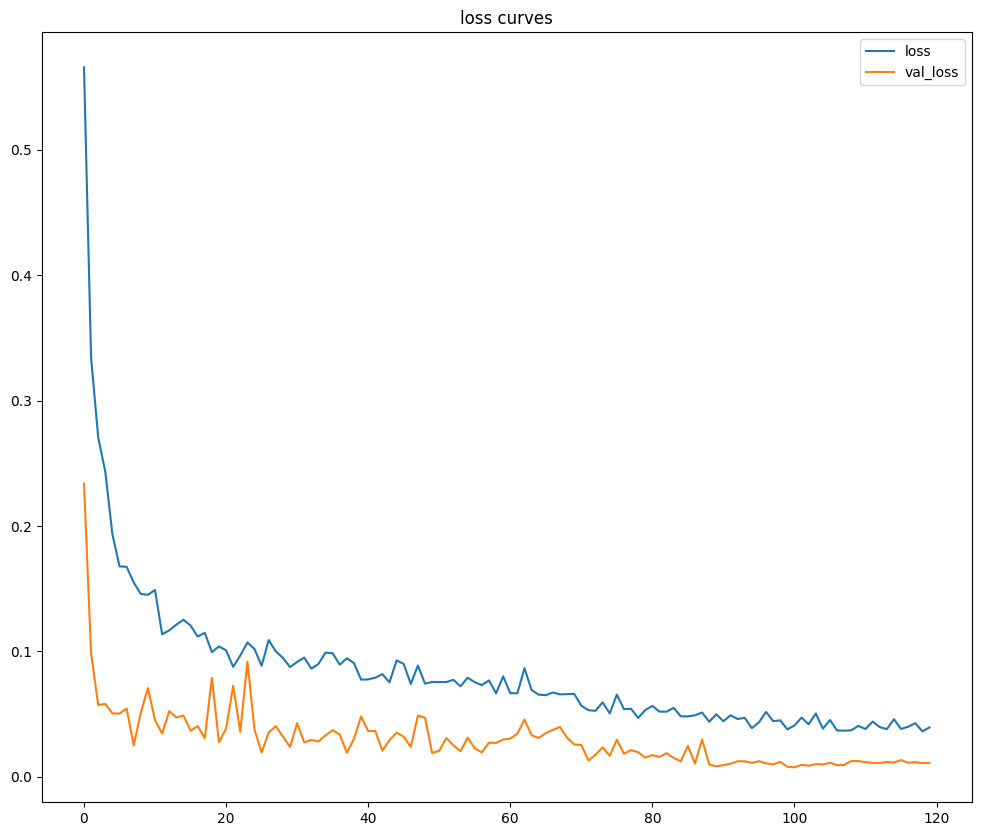

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss curves
plt.figure(figsize=(12,10))
plt.title("loss curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

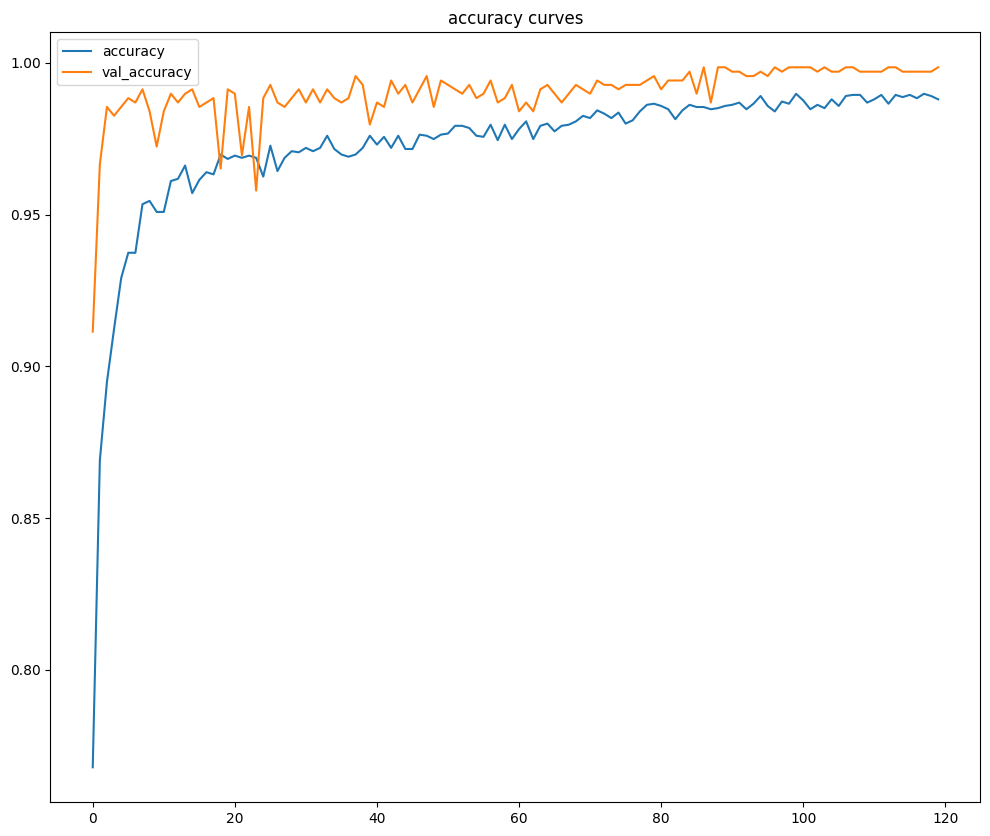

In [ ]:
# Plotting accuracy curves
plt.figure(figsize=(12,10))
plt.title("accuracy curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [ ]:
# Creating new generator for test data
test_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for test images
        target_size=(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
        shuffle=False)  # We don't want to shuffle the test data

# Predicting labels for all test images
y_pred = model.predict(test_generator)
y_pred[:10]

Found 689 images belonging to 2 classes.
22/22 [==============================] - 7s 262ms/step


array([[3.8159657e-03],
       [7.7282538e-04],
       [1.5343425e-01],
       [9.3284238e-05],
       [5.4754499e-05],
       [6.1896708e-02],
       [2.0159802e-03],
       [1.2339612e-02],
       [1.6204704e-04],
       [1.3592954e-01]], dtype=float32)

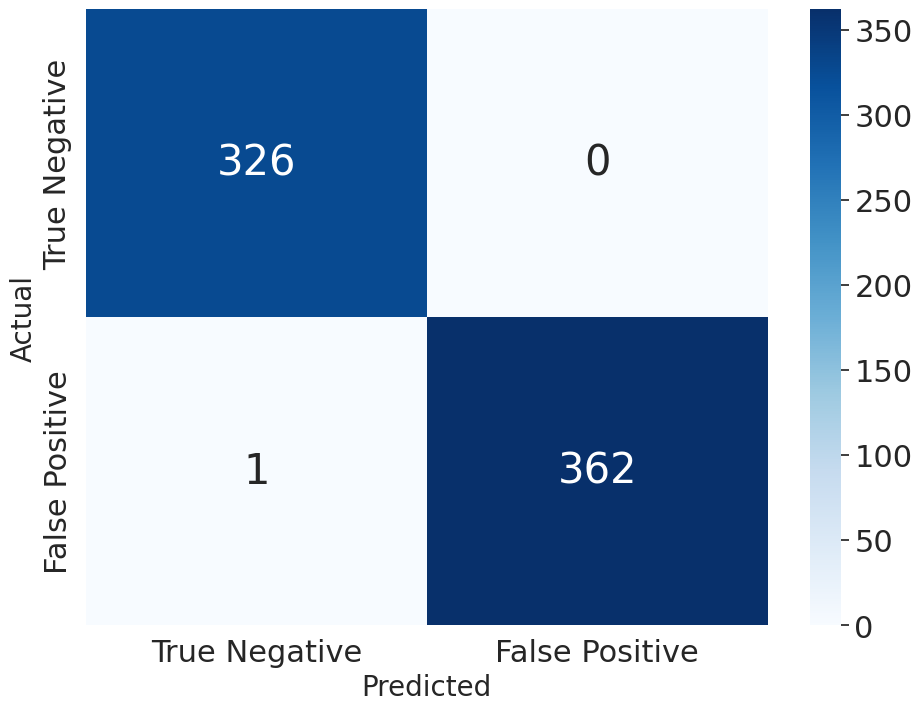

In [ ]:
from sklearn.metrics import confusion_matrix

# Getting the true labels for the test data
y_true = test_generator.labels

# Converting the predicted labels to binary labels
y_pred = np.round(y_pred)

# Calculating the confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)

# Displaying the confusion matrix
import seaborn as sns
from seaborn import heatmap

plt.figure(figsize=(11,8))
sns.set(font_scale=2)

heatmap(confusion_matrix,
        annot=True,
        annot_kws={"size": 30},
        fmt='g',
        cmap='Blues',
        xticklabels=['True Negative', 'False Positive'],
        yticklabels=['True Negative', 'False Positive'])

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

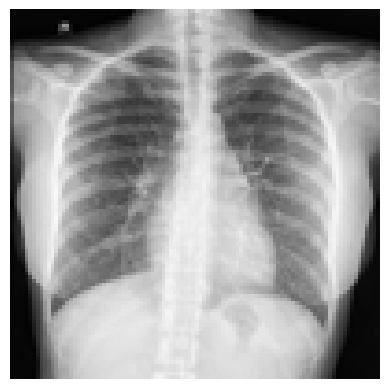

In [ ]:
# Getting indecies of wrongly classified images
misclassified_indices = np.where(y_true.reshape(-1,1) != y_pred)[0]

# Displaying all wrongly classified images
for i in misclassified_indices:
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Getting the true labels for the test data
y_true = test_generator.labels

# Converting the predicted labels to binary labels
y_pred = np.round(y_pred)

# Displaying classification report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       326
           1       1.00      1.00      1.00       363

    accuracy                           1.00       689
   macro avg       1.00      1.00      1.00       689
weighted avg       1.00      1.00      1.00       689



#Keterangan hasil:

### Confusion Matrix

1. **True Positive (TP)**: Ada 326 sampel positif yang diklasifikasikan dengan benar oleh model. Ini menunjukkan bahwa model mampu dengan baik dalam mengidentifikasi sampel yang sebenarnya positif.

2. **True Negative (TN)**: Ada 362 sampel negatif yang diklasifikasikan dengan benar oleh model. Ini menunjukkan bahwa model juga mampu dengan baik dalam mengidentifikasi sampel yang sebenarnya negatif.

3. **False Positive (FP)**: Hanya ada 1 sampel negatif yang salah diklasifikasikan sebagai positif oleh model. Ini adalah kesalahan yang sangat kecil, yang menunjukkan bahwa model memiliki tingkat spesifisitas yang tinggi.

4. **False Negative (FN)**: Tidak ada sampel positif yang salah diklasifikasikan sebagai negatif oleh model. Ini menunjukkan bahwa model memiliki tingkat sensitivitas yang tinggi.


### Classification Report
Model memiliki nilai akurasi, precision, recall, dan f1-score sebesar 100% untuk kedua kelas.

### Kesimpulan

Berdasarkan Confusion Matrix dan Classification Report:

1. Dari hasil di atas, terlihat bahwa model memiliki kinerja yang sangat baik, dengan tingkat akurasi yang tinggi dan kemampuan yang baik dalam mengklasifikasikan kedua kelas.
2. Hanya ada satu contoh yang salah diklasifikasikan sebagai positif (False Positive), dan tidak ada contoh positif yang salah diklasifikasikan sebagai negatif (False Negative).
3. Model ini sangat efektif dalam membedakan antara kelas positif dan negatif.